## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [53]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [54]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,00:30,2020-01-01T00:30:00+01:00,5759.0,1402.0,NaN,2.0,...,NaN,0.03,4.17,0.0,0.0,26.69,47.03,1.98,38.91,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,01:15,2020-01-01T01:15:00+01:00,5740.0,1249.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,28.07,49.30,1.99,38.91,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,02:30,2020-01-01T02:30:00+01:00,5644.0,1020.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,24.22,41.83,2.00,38.57,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,02:45,2020-01-01T02:45:00+01:00,5527.0,711.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,20.45,34.58,2.04,38.57,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,04:00,2020-01-01T04:00:00+01:00,5237.0,236.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,21.02,33.69,2.16,38.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-16,14:30,2020-02-16T14:30:00+01:00,4699.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-16,16:30,2020-02-16T16:30:00+01:00,4407.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-16,18:45,2020-02-16T18:45:00+01:00,5271.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-16,20:45,2020-02-16T20:45:00+01:00,5184.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [55]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True)
data.dtypes

Code INSEE région                    int64
Région                              object
Nature                              object
Date                        datetime64[ns]
Heure                               object
Date - Heure           datetime64[ns, UTC]
Consommation (MW)                  float64
Thermique (MW)                     float64
Nucléaire (MW)                     float64
Eolien (MW)                        float64
Solaire (MW)                       float64
Hydraulique (MW)                   float64
Pompage (MW)                       float64
Bioénergies (MW)                   float64
Ech. physiques (MW)                float64
TCO Thermique (%)                  float64
TCH Thermique (%)                  float64
TCO Nucléaire (%)                  float64
TCH Nucléaire (%)                  float64
TCO Eolien (%)                     float64
TCH Eolien (%)                     float64
TCO Solaire (%)                    float64
TCH Solaire (%)                    float64
TCO Hydraul

In [56]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [57]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [58]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2020-01-01':                   Date - Heure  Consommation (MW)  Thermique (MW)  \
 0    2019-12-31 23:30:00+00:00             5759.0          1402.0   
 1    2020-01-01 00:15:00+00:00             5740.0          1249.0   
 2    2020-01-01 01:30:00+00:00             5644.0          1020.0   
 3    2020-01-01 01:45:00+00:00             5527.0           711.0   
 4    2020-01-01 03:00:00+00:00             5237.0           236.0   
 ...                        ...                ...             ...   
 3619 2020-01-01 20:45:00+00:00             5579.0          1799.0   
 3620 2020-01-01 21:00:00+00:00             5561.0          1780.0   
 3621 2020-01-01 21:15:00+00:00             5555.0          1778.0   
 3622 2020-01-01 22:30:00+00:00             6009.0           829.0   
 3623 2020-01-01 22:45:00+00:00             5988.0             NaN   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN          2.0           0.0            1537.0   
 1  

In [59]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

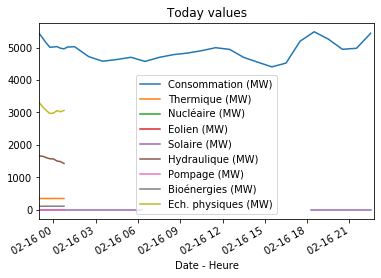

In [60]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")
# TODO: replace with : data.loc[data['Date - Heure'] == today].plot(x='Date - Heure', title="Today values")

In [61]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [62]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

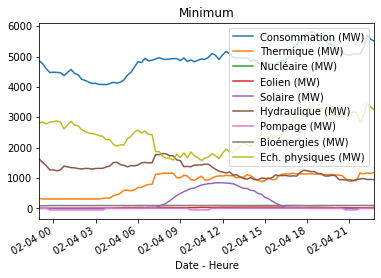

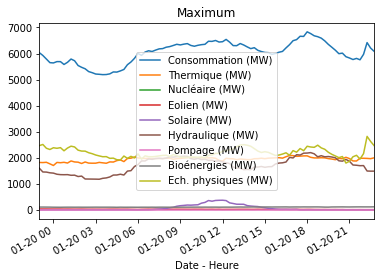

In [63]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [64]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5430.806695
Thermique (MW)         1204.045043
Nucléaire (MW)                 NaN
Eolien (MW)              11.028029
Solaire (MW)            125.745520
Hydraulique (MW)       1532.772295
Pompage (MW)             -7.784518
Bioénergies (MW)        108.493210
Ech. physiques (MW)    2458.878678
TCO Thermique (%)        21.872168
TCH Thermique (%)        36.715742
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.204953
TCH Eolien (%)           22.974914
TCO Solaire (%)           2.315289
TCH Solaire (%)           9.620139
TCO Hydraulique (%)      28.130840
TCH Hydraulique (%)      46.905613
TCO Bioénergies (%)       2.005466
TCH Bioénergies (%)      37.028828
Column 26                      NaN
dtype: float64

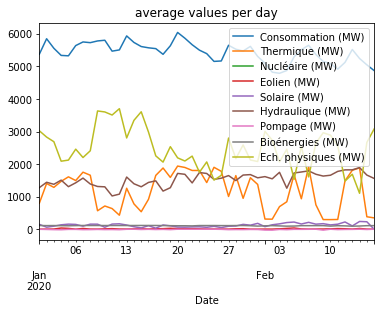

In [65]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

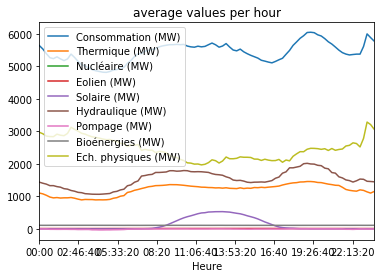

In [66]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

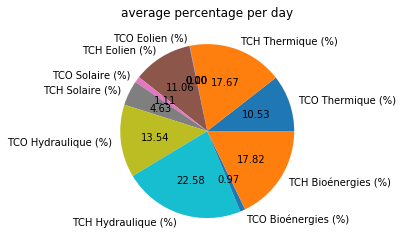

In [67]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')